In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
dataset = pd.read_csv("cardio_train.csv", sep=";")

In [20]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [21]:
dataset.set_index('id', inplace=True)
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [22]:
dataset.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [23]:
# Credit: https://www.kaggle.com/sulianova/eda-cardiovascular-data
dataset.drop(dataset[(dataset['height'] > dataset['height'].quantile(0.975)) | (dataset['height'] < dataset['height'].quantile(0.025))].index, inplace=True)
dataset.drop(dataset[(dataset['weight'] > dataset['weight'].quantile(0.975)) | (dataset['weight'] < dataset['weight'].quantile(0.025))].index, inplace=True)

In [24]:
print("Diastolic pressure is higher than systolic one in {0} cases".format(dataset[dataset['ap_lo'] > dataset['ap_hi']].shape[0]))

Diastolic pressure is higher than systolic one in 1082 cases


In [25]:
# Credit: https://www.kaggle.com/sulianova/eda-cardiovascular-data
dataset.drop(dataset[(dataset['ap_hi'] > dataset['ap_hi'].quantile(0.975)) | (dataset['ap_hi'] < dataset['ap_hi'].quantile(0.025))].index, inplace=True)
dataset.drop(dataset[(dataset['ap_lo'] > dataset['ap_lo'].quantile(0.975)) | (dataset['ap_lo'] < dataset['ap_lo'].quantile(0.025))].index, inplace=True)

In [26]:
print("Diastolic pressure is higher than systolic one in {0} cases".format(dataset[dataset['ap_lo'] > dataset['ap_hi']].shape[0]))

Diastolic pressure is higher than systolic one in 0 cases


In [27]:
dataset['age'] = (dataset['age'] / 365).round().astype('int')

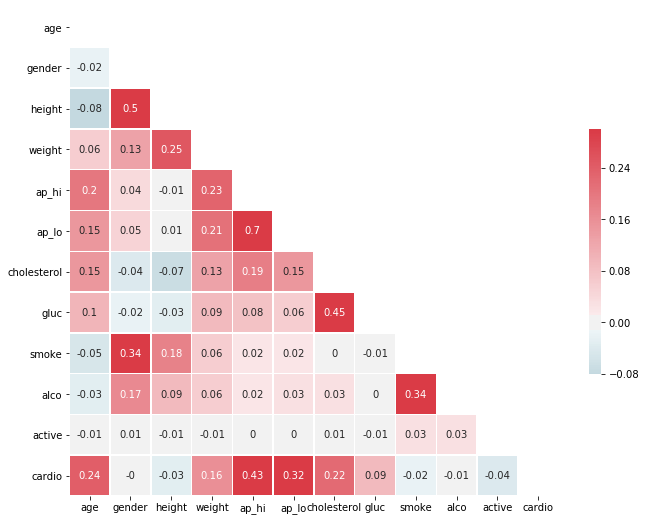

In [28]:
# Credit: https://www.kaggle.com/sulianova/eda-cardiovascular-data
corr = round(dataset.corr(), 2)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [29]:
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = ['cardio']

In [30]:
categorical_features = ['gender', 'cholesterol', 'gluc']

In [31]:
dataset = pd.get_dummies(dataset, columns=categorical_features, prefix=categorical_features)

In [32]:
dataset.head()

,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,
0,50,168,62.0,110,80,0,0,1,0,0,1,1,0,0,1,0,0
1,55,156,85.0,140,90,0,0,1,1,1,0,0,0,1,1,0,0
2,52,165,64.0,130,70,0,0,0,1,1,0,0,0,1,1,0,0
3,48,169,82.0,150,100,0,0,1,1,0,1,1,0,0,1,0,0
4,48,156,56.0,100,60,0,0,0,0,1,0,1,0,0,1,0,0


In [33]:
X = dataset.drop(target, axis=1)
y = dataset[target].values.ravel()

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X.astype(float), y, test_size=0.3, random_state=43)

# Perceptron

In [35]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Perceptron with standard scaler
std_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('perceptron', Perceptron(max_iter=8000, tol=1e-3, early_stopping=True, alpha=0.0001, n_jobs=-1))
])

std_perceptron.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_perceptron.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_perceptron.score(X_val, y_val)*100))

Accuracy on train 65.49%
Accuracy on val 65.40%


In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('perceptron', Perceptron(max_iter=8000, tol=1e-3, early_stopping=True, alpha=0.0001, n_jobs=-1))
])

poly_perceptron.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(poly_perceptron.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(poly_perceptron.score(X_val, y_val)*100))

Accuracy on train 65.26%
Accuracy on val 64.81%


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_lr = Pipeline([
    ('std', StandardScaler()),
    ('lr', LogisticRegression(penalty='l2', solver='lbfgs', tol=1e-2, C=1, random_state=43, multi_class='ovr', n_jobs=-1))
])

std_lr.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_lr.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_lr.score(X_val, y_val)*100))

Accuracy on train 72.09%
Accuracy on val 72.28%


# Gaussian Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_gnb = Pipeline([
    ('std', StandardScaler()),
    ('gnb', GaussianNB(var_smoothing=0.001))
])

std_gnb.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_gnb.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_gnb.score(X_val, y_val)*100))

Accuracy on train 67.59%
Accuracy on val 67.96%


# K Nearest Neighbour

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_knn = Pipeline([
    ('std', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=15, leaf_size=70, algorithm='auto', n_jobs=-1))
])

std_knn.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_knn.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_knn.score(X_val, y_val)*100))

Accuracy on train 74.37%
Accuracy on val 71.61%


# SVM

In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_svm = Pipeline([
    ('std', StandardScaler()),
    ('svm', SVC(gamma='auto', kernel='rbf'))
])

std_svm.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_svm.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_svm.score(X_val, y_val)*100))

Accuracy on train 73.06%
Accuracy on val 72.93%


## GridSearch SVM

In [52]:
from sklearn.model_selection import GridSearchCV

grid = {
    'svm__kernel': ['rbf'],
    'svm__C': (1, 0.25, 0.5, 0.75),
    'svm__gamma': (1, 2, 3, 'auto'),
    #'svm__decision_function_shape': ('ovo', 'ovr'),
    'svm__shrinking': (True, False),
}

gs_svm = GridSearchCV(std_svm, grid, cv=3, n_jobs=-1, return_train_score=True)
gs_svm.fit(X_train, y_train)

/usr/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


NameError: name 'cross_val_score' is not defined

In [53]:
pd.DataFrame(gs_svm.cv_results_).sort_values('rank_test_score').head(5)

/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__gamma,param_svm__kernel,param_svm__shrinking,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
7,57.461352,0.697710,10.310260,0.289222,1,auto,rbf,False,"{'svm__C': 1, 'svm__gamma': 'auto', 'svm__kern...",0.724312,0.725647,0.722919,0.724293,0.001114,1,0.731160,0.730920,0.733245,0.731775,0.001044
6,65.820961,1.536851,10.478450,0.268192,1,auto,rbf,True,"{'svm__C': 1, 'svm__gamma': 'auto', 'svm__kern...",0.724312,0.725647,0.722919,0.724293,0.001114,1,0.731160,0.730920,0.733245,0.731775,0.001044
31,51.710813,1.197224,7.862846,0.819656,0.75,auto,rbf,False,"{'svm__C': 0.75, 'svm__gamma': 'auto', 'svm__k...",0.724882,0.724863,0.722278,0.724008,0.001223,3,0.729806,0.729317,0.731357,0.730160,0.000870
30,62.932883,0.713483,10.148071,0.325230,0.75,auto,rbf,True,"{'svm__C': 0.75, 'svm__gamma': 'auto', 'svm__k...",0.724882,0.724934,0.722206,0.724008,0.001274,3,0.729806,0.729352,0.731428,0.730195,0.000891
22,69.194869,0.396491,10.757817,0.091802,0.5,auto,rbf,True,"{'svm__C': 0.5, 'svm__gamma': 'auto', 'svm__ke...",0.724027,0.725077,0.722206,0.723770,0.001186,5,0.729663,0.728176,0.730146,0.729328,0.000838


# XGBoost

In [41]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_xgb = Pipeline([
    ('std', StandardScaler()),
    ('svm', XGBClassifier(nthread=8, n_estimators=1000, objective='binary:logistic', early_stopping_rounds=10, eta=0.5, min_child_weight=3))
])

std_xgb.fit(X_train, y_train)
print('Accuracy on train {:.2f}%'.format(std_xgb.score(X_train, y_train)*100))
print('Accuracy on val {:.2f}%'.format(std_xgb.score(X_val, y_val)*100))

Accuracy on train 74.10%
Accuracy on val 72.72%


# NN

In [42]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
    plt.ylim([0,2])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
    plt.ylim([0.4, 1])
    plt.legend()
    plt.show()

In [43]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D

scaler_X = StandardScaler()
std_X_train = scaler_X.fit_transform(X_train.astype(float))
std_X_val = scaler_X.transform(X_val)

std_y_train = to_categorical(y_train)
std_y_val = to_categorical(y_val)

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

def nn_build_model():
    model = Sequential([
        Dense(11, kernel_initializer='random_uniform', activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
        Dense(11, kernel_initializer='random_uniform', activation=tf.nn.relu),
        Dense(1, kernel_initializer='random_uniform', activation=tf.nn.sigmoid)
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [44]:
model = nn_build_model()
history = model.fit(std_X_train, y_train, validation_split=0.3, epochs=10, verbose=0, callbacks=[PrintDot()])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.

..........

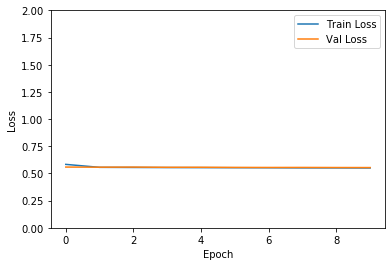

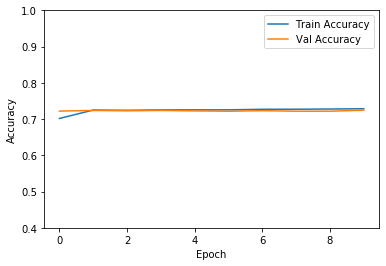

In [45]:
hist = pd.DataFrame(history.history)
plot_history(history)

In [46]:
model.evaluate(scaler_X.transform(X_val), y_val)

18043/18043 [==============================] - 1s 34us/sample - loss: 0.5504 - acc: 0.7294


[0.5504449172112588, 0.7294242]

In [47]:
y_pred = model.predict(scaler_X.transform(X_val))
y_pred =(y_pred > 0.5)

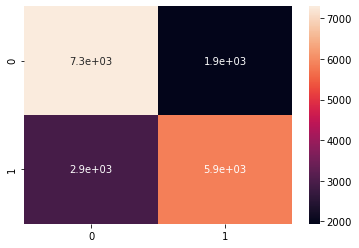

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True)

In [49]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

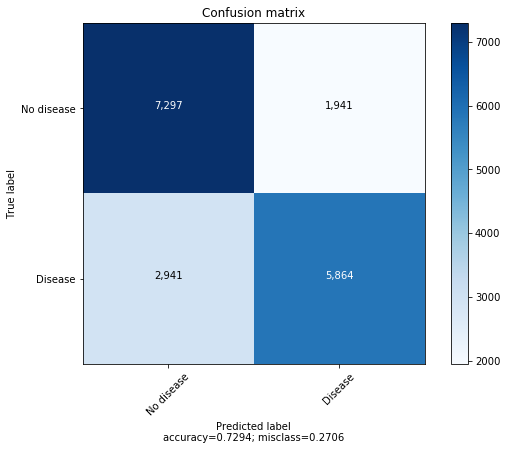

In [50]:
plot_confusion_matrix(cm, target_names=['No disease', 'Disease'], normalize=False)